# Introduction

QA plots for the TPC detector

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import os.path

# readme file of the macros, available if run under JenkinsCI
# https://github.com/sPHENIX-Collaboration/utilities/blob/master/jenkins/built-test/test-tracking-qa.sh 

macro_markdown = 'Fun4All-macros-README.md'

if os.path.isfile(macro_markdown) :
    with open(macro_markdown, 'r') as file:
        display(Markdown(file.read()))

## `pyROOT` env check

In [4]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.22/02


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.1`


# Initialization

In [5]:
%%cpp -d


#include "SaveCanvas.C"
#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [6]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

// test sPHENIX lib load
gSystem->Load("libg4eval.so");

// test libs
gSystem->ListLibraries();

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode
 
Loaded shared libraries
/usr/lib64/libc.so
/usr/lib64/libm.so
/usr/lib64/libdl.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/lib/libpython3.8.so.1.0
/usr/lib64/libcrypt.so.1
/usr/lib64/libpthread.so.0
/usr/lib64/libutil.so.1
/usr/lib64/libfreebl3.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/bin/../stow/Python-3.8.0/lib/python3.8/lib-dynload/_heapq.cpython-38-x86_64-linux-gnu.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/stow/Python-3.8.0/lib/python3.8/lib-dynload/_json.cpython-38-x86_64-linux-gnu.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/stow/Python-3.8.0/lib/python3.8/lib-dynload/_posixsubprocess.cpython-38-x86_64-linux-gnu.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/stow/Python-3.8.0/lib/python3.8/lib-dynload/select.cpython-38-x86_64-linux-gnu.so
/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/opt/sphenix/core/stow/Python-3.8.0/lib/python3.8/lib-dynload/math.cpython-38-x86

## Inputs and file checks

In [7]:
%%cpp

TFile *qa_file_new = new TFile("data/G4EICDetector_DSTReader_ecce-inner-scan.root");


    
if (qa_file_new == nullptr) 
{
    cout <<"Error, can not open QA root file"<<qa_file_name_new<<endl;
    exit(1);
}

TTree * T = nullptr; 

qa_file_new->GetObject("T", T);

    
if (T == nullptr) 
{
    cout <<"Error, can not open T Tree"<<endl;
    exit(1);
}

In [8]:
%%cpp
T->Show(0);

======> EVENT:0
 n_G4HIT_TrackingService = 1218
 G4HIT_TrackingService = 1218
 G4HIT_TrackingService.fUniqueID = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 G4HIT_TrackingService.fBits = 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648, 50331648
 G4HIT_TrackingService.x[2] = -14.220694 , -14.220620 
, 154.536469 , 154.541702 
, 154.541702 , 154.541580 
, 228.084808 , 228.203476 
, 222.718704 , 222.712799 
, 71.961052 , 71.962112 
, 267.583252 , 267.586853 
, 124.940048 , 124.954247 
, 135.083054 , 135.098663 
, 135.098663 , 135.098679 
, 269.936371 , 269.962433 
, 269.962433 , 269.962708 
, 30.237604 , 30.252077 
, 6.607822 , 6.634811 
, 161.902283 , 161.981262 
, 162.190872 , 162.194580 
, -257.752747 , -257.876282 
, -14.737927 , -14.738398 
, 228.203476 , 228.258194 
, 124.954247 , 125.466347 

 G4HIT_TrackingService.y[2] = -269.

In [9]:
%%cpp -d 

TGraph * GetHits(const TString & hitnode, const  Long64_t nentries, const  Color_t color)
{
    TString DrawLine = 
    Form("sqrt(G4HIT_%s[].get_x(0)**2 + G4HIT_%s[].get_y(0)**2):G4HIT_%s[].get_z(0)",        
        hitnode.Data(),
        hitnode.Data(),
        hitnode.Data()
        );
    
    // cout <<DrawLine<<endl;
    
    T->Draw(DrawLine
            ,nullptr,"goff",nentries);
    TGraph *gr_TrackingService = new TGraph(T->GetSelectedRows(),
                                   T->GetV2(), T->GetV1());
    
    gr_TrackingService->SetName(Form("grHits_%s", hitnode.Data()));
    
    gr_TrackingService->SetMarkerStyle(kDot);
    gr_TrackingService->SetMarkerColor(color);
    gr_TrackingService->SetMarkerSize(2);
    
    return gr_TrackingService;
}

In [10]:
%%cpp -d 

TLine * DrawEta(double eta)
{
    
    const double theta = 2 * atan( exp(-eta) );
    double x = 300*cos(theta);
    double y = 300*sin(theta);
    
    if (x > 200.)
    { 
        y = 200. / x * y;
        x = 200.;
    }
    if (x < -200.)
    { 
        y = -200. / x * y;
        x = -200.;
    }
    if (y > 90.)
    { 
        x = 90. / y * x;
        y = 90.;
    }


    TLine *l = new TLine(0 ,0, x, y);
    l->SetLineColor(kGray);
    l->Draw();
    
    return l;
}

Save TH1 hframe
Save TGraph grHits_TrackingService
Save TGraph grHits_FTTL_0
Save TGraph grHits_CTTL_0
Save TGraph grHits_ETTL_0
Save TGraph grHits_SVTX_0
Save TGraph grHits_SVTX_1
Save TGraph grHits_SVTX_2
Save TGraph grHits_BARR_0
Save TGraph grHits_BARR_1
Save TGraph grHits_RWELL_0
Save TGraph grHits_RWELL_1
Save TGraph grHits_RWELL_2
Save TGraph grHits_EST_0
Save TGraph grHits_EST_1
Save TGraph grHits_EST_2
Save TGraph grHits_EST_3
Save TGraph grHits_FST_0
Save TGraph grHits_FST_1
Save TGraph grHits_FST_2
Save TGraph grHits_FST_3
Save TGraph grHits_FST_4
Save TGraph grHits_hpDIRC
Save TGraph grHits_dRICh_0
Save TGraph grHits_mRICH
Save TGraph grHits_ABSORBER_mRICH


Warning in <TCanvas::Constructor>: Deleting canvas with same name: HitScan
Info in <TCanvas::Print>: png file data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.png has been created
Info in <TCanvas::SaveAs>: ROOT file data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.root has been created
Info in <TCanvas::Print>: eps file data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.eps has been created
Info in <TCanvas::Print>: SVG file data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.svg has been created
Info in <TCanvas::Print>: pdf file data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: data/G4EICDetector_DSTReader_ecce-inner-scan.root_HitScan.C has been generated


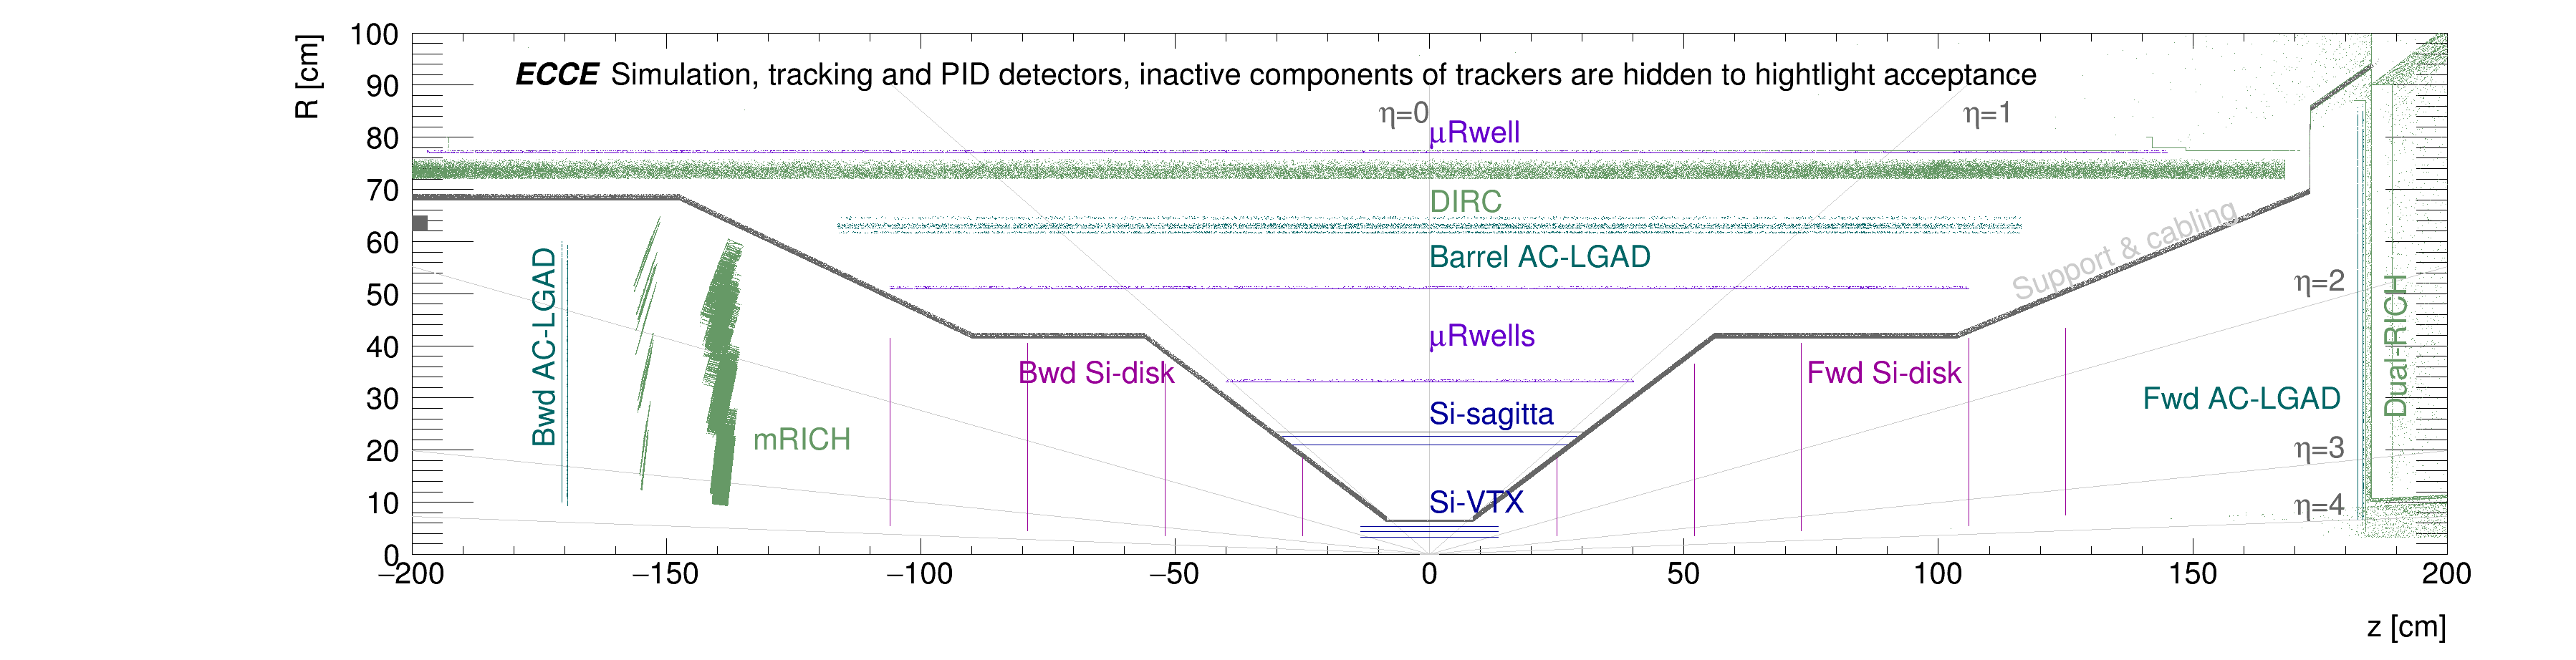

In [15]:
%%cpp
{
    Long64_t nentries = 200;
    
   TLatex *t = nullptr;
    
    const char *hist_name_prefix = "HitScan";
    auto c1 = new TCanvas(TString("HitScan") ,
                        TString("HitScan"),
                        3600, 950);

    TH1 * hFrame = gPad->DrawFrame(-200, 0, 200, 100,";z [cm];R [cm]");
    hFrame->GetYaxis()->SetTitleOffset(.5) ;
    
    // t = new TLatex(-180,90,"#it{#bf{ECCE}} Simulation, prop.5 Oct-Concept, active vol. of tracker and passive vol. of support and PID");
    t = new TLatex(-180,90,"#it{#bf{ECCE}} Simulation, tracking and PID detectors, inactive components of trackers are hidden to hightlight acceptance");
    t->SetTextAlign(11);
    t->SetTextColor(kBlack);
    t->Draw();
    
    DrawEta(0);
    DrawEta(+1);
    DrawEta(-1);
    DrawEta(+2);
    DrawEta(-2);
    DrawEta(+3);
    DrawEta(-3);
    DrawEta(+4);
    DrawEta(-4);
    
    t = new TLatex(0,87,"#eta=0");
    t->SetTextAlign(33);
    t->SetTextColor(kGray+2);
    t->Draw();
    t = new TLatex(105,87,"#eta=1");
    t->SetTextAlign(13);
    t->SetTextColor(kGray+2);
    t->Draw();
    t = new TLatex(170,52,"#eta=2");
    t->SetTextAlign(12);
    t->SetTextColor(kGray+2);
    t->Draw();
    t = new TLatex(170,20,"#eta=3");
    t->SetTextAlign(12);
    t->SetTextColor(kGray+2);
    t->Draw();
    t = new TLatex(170,9,"#eta=4");
    t->SetTextAlign(12);
    t->SetTextColor(kGray+2);
    t->Draw();
    
    GetHits("TrackingService", nentries, kGray + 2)->Draw("p");
    t = new TLatex(115, 50,"Support & cabling");
    t->SetTextAlign(12);
    t->SetTextAngle(21);
    t->SetTextColor(kGray);
    t->Draw();
    
    GetHits("FTTL_0", nentries, kCyan + 3)->Draw("p");
    GetHits("CTTL_0", nentries, kCyan + 3)->Draw("p");
    GetHits("ETTL_0", nentries, kCyan + 3)->Draw("p");
    t = new TLatex(0,55,"Barrel AC-LGAD");
    t->SetTextAlign(11);
    t->SetTextColor(kCyan + 3);
    t->Draw();
    t = new TLatex(-172,40,"Bwd AC-LGAD");
    t->SetTextAlign(21);
    t->SetTextAngle(90);
    t->SetTextColor(kCyan + 3);
    t->Draw();
    t = new TLatex(180,30,"Fwd AC-LGAD");
    t->SetTextAlign(32);
    t->SetTextColor(kCyan + 3);
    t->Draw();
    
    GetHits("SVTX_0", nentries, kBlue + 2)->Draw("p");
    GetHits("SVTX_1", nentries, kBlue + 2)->Draw("p");
    GetHits("SVTX_2", nentries, kBlue + 2)->Draw("p");
    GetHits("BARR_0", nentries, kBlue + 2)->Draw("p");
    GetHits("BARR_1", nentries, kBlue + 2)->Draw("p");
    t = new TLatex(0,25,"Si-sagitta");
    t->SetTextAlign(11);
    t->SetTextColor(kBlue + 2);
    t->Draw();
    t = new TLatex(0,8,"Si-VTX");
    t->SetTextAlign(11);
    t->SetTextColor(kBlue + 2);
    t->Draw();
    
    GetHits("RWELL_0", nentries, kViolet + 2)->Draw("p");
    GetHits("RWELL_1", nentries, kViolet + 2)->Draw("p");
    GetHits("RWELL_2", nentries, kViolet + 2)->Draw("p");
    t = new TLatex(0,79,"#muRwell");
    t->SetTextAlign(11);
    t->SetTextColor(kViolet + 2);
    t->Draw();
    t = new TLatex(0,40,"#muRwells");
    t->SetTextAlign(11);
    t->SetTextColor(kViolet + 2);
    t->Draw();
    
    GetHits("EST_0", nentries, kMagenta + 2)->Draw("p");
    GetHits("EST_1", nentries, kMagenta + 2)->Draw("p");
    GetHits("EST_2", nentries, kMagenta + 2)->Draw("p");
    GetHits("EST_3", nentries, kMagenta + 2)->Draw("p");
    t = new TLatex(-65,35,"Bwd Si-disk");
    t->SetTextAlign(22);
    t->SetTextColor(kMagenta + 2);
    t->Draw();
    
    GetHits("FST_0", nentries, kMagenta + 2)->Draw("p");
    GetHits("FST_1", nentries, kMagenta + 2)->Draw("p");
    GetHits("FST_2", nentries, kMagenta + 2)->Draw("p");
    GetHits("FST_3", nentries, kMagenta + 2)->Draw("p");
    GetHits("FST_4", nentries, kMagenta + 2)->Draw("p");
    t = new TLatex(90,35,"Fwd Si-disk");
    t->SetTextAlign(22);
    t->SetTextColor(kMagenta + 2);
    t->Draw();
    
    GetHits("hpDIRC", nentries, kGreen-5)->Draw("p");
    GetHits("dRICh_0", nentries, kGreen-5)->Draw("p");
    GetHits("mRICH", nentries, kGreen-5)->Draw("p");
    GetHits("ABSORBER_mRICH", nentries, kGreen-5)->Draw("p");
    t = new TLatex(0,70,"DIRC");
    t->SetTextAlign(13);
    t->SetTextColor(kGreen-5);
    t->Draw();
    t = new TLatex(-133,20,"mRICH");
    t->SetTextAlign(11);
    t->SetTextColor(kGreen -5);
    t->Draw();
    t = new TLatex(192,40,"Dual-RICH");
    t->SetTextAlign(21);
    t->SetTextAngle(90);
    t->SetTextColor(kGreen -5);
    t->Draw();
    
//     GetHits("EEMC", nentries, kGreen+2)->Draw("p");

    
    SaveCanvas(c1, TString(qa_file_new->GetName()) + TString("_") + TString(c1->GetName()), true);
    c1->Draw();
}